In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only first 2 features for easy plotting
y = iris.target

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert to torch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.long)

In [ ]:
class IrisNet(nn.Module):
    def __init__(self, activation='relu'):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 3)

        if activation == 'relu':
            self.activation = F.relu
        elif activation == 'tanh':
            self.activation = torch.tanh
        elif activation == 'sigmoid':
            self.activation = torch.sigmoid
        elif activation == 'leaky_relu':
            self.activation = F.leaky_relu
        else:
            raise ValueError("Unsupported activation")

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)  # No activation here because CrossEntropyLoss expects logits
        return x

In [ ]:
def train_model(activation='relu', epochs=100, lr=0.01):
    model = IrisNet(activation)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_t)
        loss = criterion(outputs, y_train_t)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    return model, losses

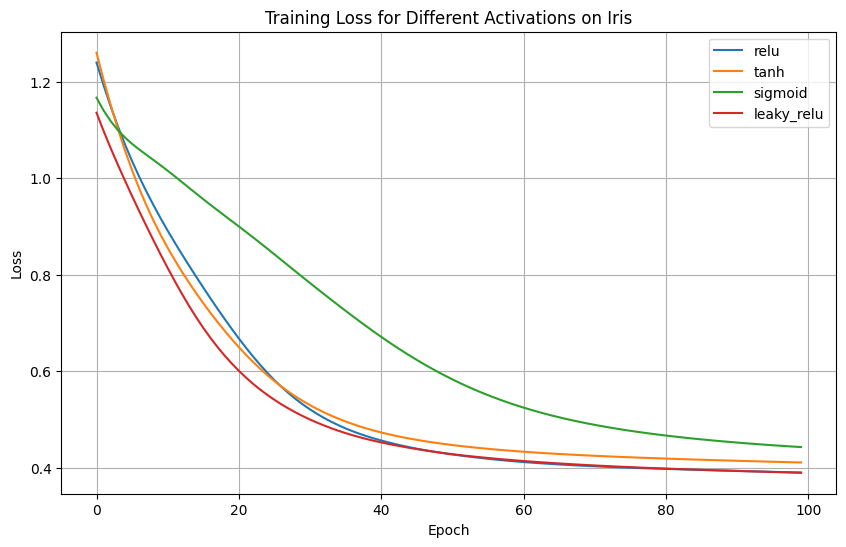

In [ ]:
# 4. Train and plot loss for different activations
activations = ['relu', 'tanh', 'sigmoid', 'leaky_relu']
plt.figure(figsize=(10,6))

for act in activations:
    model, losses = train_model(activation=act)
    plt.plot(losses, label=act)

plt.title("Training Loss for Different Activations on Iris")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()